# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_by_type=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers_by_type=city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
fare_type_average = total_fares_by_type / total_rides_by_type
fare_type_average

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares_by_type / total_drivers_by_type
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides_by_type,
     "Total Drivers": total_drivers_by_type,
    "Total Fares": total_fares_by_type,
     "Average Fare per Ride": fare_type_average,
    "Average Fare per Driver": average_fare_per_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] =pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] =pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
month_date_fare_df = pyber_data_df.groupby(["date","type"]).sum()["fare"]
month_date_fare_df

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [12]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
month_date_fare_df = month_date_fare_df.reset_index()

In [13]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
table = month_date_fare_df.pivot(values="fare", index="date",columns="type")
table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
key_dates_df = month_date_fare_df.loc[(month_date_fare_df["date"] > "2019-01-01") & (month_date_fare_df["date"] <= "2019-04-29")]
key_dates_df


,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2191,2019-04-28 14:28:36,Urban,11.46
2192,2019-04-28 16:29:16,Urban,36.42
2193,2019-04-28 17:26:52,Urban,31.43
2194,2019-04-28 17:38:09,Suburban,34.87


In [22]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
key_dates_df["date"] = pd.to_datetime(key_dates_df["date"])
key_dates_df =key_dates_df.set_index("date")
key_dates_df

C:\Users\wcat1\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,type,fare
date,,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-04-28 14:28:36,Urban,11.46
2019-04-28 16:29:16,Urban,36.42
2019-04-28 17:26:52,Urban,31.43


In [23]:
# 6. Check that the datatype for the index is datetime using df.info()
key_dates_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    2196 non-null   object 
 1   fare    2196 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.5+ KB


In [33]:
weekly_resample = key_dates_df.groupby("type").resample('W').sum()[["fare"]]
weekly_resample

fare
type     date               
Rural    2019-01-06   187.92
         2019-01-13    67.65
         2019-01-20   306.00
         2019-01-27   179.69
         2019-02-03   333.08
         2019-02-10   115.80
         2019-02-17    95.82
         2019-02-24   419.06
         2019-03-03   175.14
         2019-03-10   303.94
         2019-03-17   163.39
         2019-03-24   189.76
         2019-03-31   199.42
         2019-04-07   501.24
         2019-04-14   269.79
         2019-04-21   214.14
         2019-04-28   191.85
Suburban 2019-01-06   721.60
         2019-01-13  1105.13
         2019-01-20  1218.20
         2019-01-27  1203.28
         2019-02-03  1042.79
         2019-02-10   974.34
         2019-02-17  1045.50
         2019-02-24  1412.74
         2019-03-03   858.46
         2019-03-10   925.27
         2019-03-17   906.20
         2019-03-24  1122.20
         2019-03-31  1045.06
         2019-04-07  1010.73
         2019-04-14   784.82
         2019-04-21  1149.27
         2019-04-28  1357.75
Urban    2019-01-06  1661.68
         2019-01-13  2050.43
         2019-01-20  1939.02
         2019-01-27  2129.51
         2019-02-03  2086.94
         2019-02-10  2162.64
         2019-02-17  2235.07
         2019-02-24  2466.29
         2019-03-03  2218.20
         2019-03-10  2470.93
         2019-03-17  2044.42
         2019-03-24  2368.37
         2019-03-31  1942.77
         2019-04-07  2356.70
         2019-04-14  2390.72
         2019-04-21  2303.80
         2019-04-28  2238.29

In [34]:
weekly_resample = weekly_resample.reset_index()
weekly_resample

,type,date,fare
0,Rural,2019-01-06,187.92
1,Rural,2019-01-13,67.65
2,Rural,2019-01-20,306.00
3,Rural,2019-01-27,179.69
4,Rural,2019-02-03,333.08
5,Rural,2019-02-10,115.80
6,Rural,2019-02-17,95.82
7,Rural,2019-02-24,419.06
8,Rural,2019-03-03,175.14
9,Rural,2019-03-10,303.94


In [40]:
weekly_resample_pivot = weekly_resample.pivot(index="date", columns="type", values="fare")
weekly_resample_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


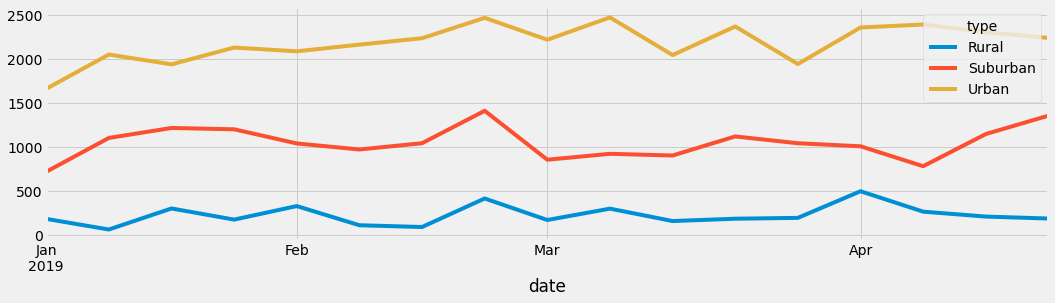

In [64]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

weekly_resample_pivot.plot(kind="line",figsize=(16,4) )

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

